# 4. Modelling - choosing the best model based on the validation score

# Load data and set up the environment

In [1]:
### 
# Functions defined below are also available as utils in .py script in the `final_submissions` directory
# Additional definitions of the assessment function included for clarity of the final submission
###

In [2]:
# Define a function to assess an instance of the fitted model on the cross-validation scorer:
def model_cross_val_assess(model, X_train, y_train, model_name):
    '''
    Takes *fitted* model in args1 and applies it to the train set (predictors matrix in args2 and respone vector in args3) while also taking model's name as arg4. 
    Returns set of metrics in a dataframe object.

    ### Examplary call of the function:
    model_cross_val_assess(model, X_train, y_train, X_test, y_test, 'my_model')


    ### How to concatenate results of several models for comparison:
    a = model_cross_val_assess(model_1, X_train, y_train, 'my_model_1')
    b = model_cross_val_assess(model_2, X_train, y_train, 'my_model_2')
    c = pd.concat([a, b], axis=1)
    '''
    import pandas as pd
    import numpy as np
    import locale
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
    from sklearn.model_selection import cross_val_score

    def get_num_columns(X):
        if isinstance(X, pd.DataFrame):
            return len(X.columns)
        elif isinstance(X, np.ndarray):
            return X.shape[1]
        else:
            raise TypeError('X must be a pandas DataFrame or a NumPy array')

    scores_dict = {}

    # Use cross-validation to evaluate the model on the training data
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_score = -scores.mean()
    std_score = scores.std()
    coef_variation = std_score / mean_score

    ## Additionally metrics for assessment on train set
    # R2 score
    y_pred = model.predict(X_train)
    r2 = r2_score(y_train, y_pred)

    # Adjusted R2
    p = get_num_columns(X_train)
    n = len(y_train)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    # Now return the metrics as the dict
    scores_dict[model_name] = [r2, adj_r2, mean_score, std_score, coef_variation]

    df_train_eval = pd.DataFrame(data=scores_dict, index=['r2', 'adj_r2', 'mean_cv_mse', 'std_cv_mse', 'coef_of_var'])
    
    # Set float_format to display numbers without scientific notation and with thousand separators
    locale.setlocale(locale.LC_ALL, '')  # Set the locale to the user's default locale
    pd.options.display.float_format = lambda x: format(locale.atof(f"{x:.1f}"), ',') if abs(x) > 999 else f"{x:.4f}"
    # in case the thousand separator is displaying incorrectly, please comment out/delete the above 2 lines and use uncomment this line:
    # pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    
    return df_train_eval

In [3]:
# Define a function to assess an instance of the fitted model on the test set:
def model_assess(model, X_test, y_test, model_name):
    '''
    Takes *fitted* model in args1 and applies it to the test set (predictors matrix in args2 and respone vector in args3) while also taking model's name as arg4. 
    Returns set of metrics in a dataframe object.

    ### Examplary call of the function:
    model_assess(model, X_test, y_test, 'my_model')

    
    ### How to concatenate results of several models for comparison:
    a = model_assess(model_1, X_test, y_test, 'my_model_1')
    b = model_assess(model_2, X_test, y_test, 'my_model_2')
    c = pd.concat([a, b], axis=1)
    '''
    import pandas as pd
    import numpy as np
    import locale
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

    def get_num_columns(X):
        if isinstance(X, pd.DataFrame):
            return len(X.columns)
        elif isinstance(X, np.ndarray):
            return X.shape[1]
        else:
            raise TypeError('X must be a pandas DataFrame or a NumPy array')

    scores_dict = {}

    # Access predictions of the fitted model on test data
    y_pred = model.predict(X_test)

    ## Metrics
    # R2 score
    r2 = r2_score(y_test, y_pred)

    # Adjusted R2
    p = get_num_columns(X_test)
    n = len(y_test)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    # MSE
    mse = mean_squared_error(y_test, y_pred, squared=True)

    # MAE
    mae = mean_absolute_error(y_test, y_pred)

    # MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Now return the metrics as the dict
    scores_dict[model_name] = [r2, adj_r2, mse, mae, mape]

    df_eval = pd.DataFrame(data=scores_dict, index=['r2', 'adj_r2', 'mse', 'mae', 'mape'])
    
    # Set float_format to display numbers without scientific notation and with thousand separators
    locale.setlocale(locale.LC_ALL, '')  # Set the locale to the user's default locale
    pd.options.display.float_format = lambda x: format(locale.atof(f"{x:.1f}"), ',') if abs(x) > 999 else f"{x:.4f}"
    # in case the thousand separator is displaying incorrectly, please comment out/delete the above 2 lines and use uncomment this line:
    # pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    
    return df_eval

In [4]:
# System communication
import os
import sys

# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc

# Model assessment - custom utils for systematic scoring and comparison
# from model_cross_val_assessment import model_cross_val_assess
# from model_assessment import model_assess

# Model assessment - for at-hand scoring
from sklearn.metrics import r2_score, mean_squared_error

# Modelling
from sklearn.model_selection import GroupShuffleSplit, GridSearchCV, KFold, GroupKFold, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from scipy.sparse import lil_matrix, csr_matrix
from scipy.stats import f_oneway, chi2_contingency, randint
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 

In [5]:
### PLEASE CHANGE THE WORKING/FILE DIRECTORY! THANK YOU
#Set the working directory
os.chdir('C:\\Users\\piotr\\OneDrive - Erasmus University Rotterdam\\Documents\\Github repositories\\Predictive-Analytics-in-Business\\Project 2\\')


## Load the data set

# Data set that was first cleaned then merged
df_final = pd.read_csv('df_final.csv')

In [6]:
df_final.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'state_code',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'funding_round_permalink', 'funded_at', 'acquirer_permalink',
       'acquirer_name', 'acquirer_category_list', 'acquirer_market',
       'acquirer_country_code', 'acquirer_state_code', 'acquirer_region',
       'acquirer_city', 'acquired_at', 'acquired_month', 'acquired_quarter',
       'acquired_year', 'investor_permalink', 'investor_name',
       'funding_total_usd', 'market', 'status', 'country_code', 'region',
       'city', 'funding_rounds', 'funding_round_type', 'funding_round_code',
       'funded_month', 'funded_quarter', 'funded_year', 'raised_amount_usd',
       'price_amount', 'price_currency_code', 'investor_country_code',
       'investor_region', 'investor_city'],
      dtype='object')

In [7]:
# To-int-to-str dtype for date-related features
df_final['funded_month'] = df_final['funded_month'].astype('int64').astype('str')
df_final['funded_quarter'] = df_final['funded_quarter'].astype('int64').astype('str')
df_final['funded_year'] = df_final['funded_year'].astype('int64').astype('str')

# Modelling

## Linear models

In [8]:
# Small cleaning for ID/timestamp type-of columns and columns with NaN
df_final_linear = df_final.drop(columns=['homepage_url', 'category_list', 'name', 'investor_permalink', 'price_amount',
                       'acquirer_permalink', 'acquired_at', 'acquired_month', 'acquired_quarter', 'acquired_year', 
                       'founded_at', 'first_funding_at', 'last_funding_at','funding_round_permalink', 'funded_at'])

df_final_linear.reset_index(drop=True, inplace=True)

# Move target to the second column position for convenience
df_final_linear.insert(1, 'funding_total_usd', df_final_linear.pop('funding_total_usd'))

In [9]:
# Further cleaning - customizable; to explore tilts in covariates
df_final_linear = df_final_linear.drop(columns=['price_currency_code', 'acquirer_state_code', 'state_code'])
df_final_linear.reset_index(drop=True, inplace=True)

In [10]:
splitter = GroupShuffleSplit(test_size=0.20, n_splits=1, random_state = 123)
split = splitter.split(df_final_linear, groups=df_final_linear['permalink'])
train_idx, test_idx = next(split)

train = df_final_linear.iloc[train_idx]
test = df_final_linear.iloc[test_idx]

X_train, y_train = train.iloc[:, train.columns.get_loc('acquirer_name'):], train.iloc[:, train.columns.get_loc('funding_total_usd')]
X_test, y_test = test.iloc[:, test.columns.get_loc('acquirer_name'):], test.iloc[:, test.columns.get_loc('funding_total_usd')]

#### Linear regression

In [11]:
# Continuous variables are stored in a list called continuous_vars
# Categorical variables are stored in a list called categorical_vars

# Get the column names of the continuous and categorical variables
continuous_vars = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
categorical_vars = list(X_train.select_dtypes(include=['object', 'datetime64[ns]']).columns)

In [12]:
# Define preprocessing steps for continuous variables
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
# Combine noww
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_vars),
        ('categorical', categorical_transformer, categorical_vars)
    ])

In [14]:
# Fit linear regression model with preprocessor
model_linreg_f = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_linreg_f.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_rounds',
                                                   'raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['acquirer_name',
                                                   'acquirer_category_list',
                                                   'acquirer_market',
                                                   'acquirer_country_code',
                                                   'acquirer_region',
                                                   'acquirer_city',
                                                   'investor_name', 'market',
                                                   'status', 'country_code',
                                                   'region', 'city',
                                                   'funding_round_type',
                                                   'funding_round_code',
                                                   'funded_month',
                                                   'funded_quarter',
                                                   'funded_year',
                                                   'investor_country_code',
                                                   'investor_region',
                                                   'investor_city'])])),
                ('regressor', LinearRegression())])

In [15]:
# Cross-validation scores on train sets
lin_a_cv = model_cross_val_assess(model_linreg_f, X_train, y_train, 'model_linreg_f')
# ---------
lin_a_cv

,model_linreg_f
r2,0.7368
adj_r2,0.7367
mean_cv_mse,1.2640687314040402e+16
std_cv_mse,"6,866,967,301,275,708.0"
coef_of_var,0.5432


In [16]:
# Get the feature names for the one-hot encoded variables
onehot_columns = preprocessor.named_transformers_[
    'categorical'].named_steps['onehot'].get_feature_names_out(categorical_vars)

# Combine the continuous variable names and one-hot encoded variable names
feature_names = continuous_vars + list(onehot_columns)

# Get the coefficients and feature importances
coefficients = model_linreg_f.named_steps['regressor'].coef_
importances = coefficients

# Table of feature importances
importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances})

# Sort df by importance score
importance_df = importance_df.sort_values('Importance', ascending=False)

# Most important features put together
print("Most influential scores, both sides:")
a_a = importance_df.head(30)
b_b = importance_df.tail(30)
c_c = pd.concat([a_a, b_b], axis=0)
# ---------
c_c

Most influential scores, both sides:


,Feature,Importance
8379,investor_name_Sprint Nextel,"1,161,365,053.8"
5049,investor_name_EquityZen,"914,489,804.0"
13982,city_The Hague,"688,609,036.6"
4911,investor_name_Eagle River Holdings,"651,900,057.6"
5130,investor_name_Farallon Capital Management,"641,817,105.9"
8671,investor_name_Technology Venture Partners US,"530,760,472.7"
1113,acquirer_name_Sprint Nextel,"521,356,085.3"
2977,acquirer_city_Overland Park,"521,356,085.3"
8624,investor_name_Tamra-Tacoma Capital Partners,"519,601,226.8"
15761,investor_city_Overland Park,"505,335,043.8"


#### Regularized (Ridge) regression

In [17]:
# Define a parameter grid for Ridge regression
ridge_param_grid = {
    'regressor__alpha': list(np.arange(500, 5500, step=500))
}

# Create a dictionary of regressors
regressors = {
    'ridge': Ridge()
}

# Create a dictionary of parameter grids
param_grids = {
    'ridge': ridge_param_grid
}

In [18]:
# Create an empty dictionary to store the results
results_regularized = {}

# Loop over the regressors
for regressor_name, regressor in regressors.items():

    # Create a pipeline for each regressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    # Create a grid search object for the regressor
    grid_search = GridSearchCV(
        pipeline, param_grids[regressor_name], cv=5, n_jobs=-1)

    # Fit the grid search object on the training data
    grid_search.fit(X_train, y_train)

    # Store the results in the dictionary
    results_regularized[regressor_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
    }

    # Print the results
    print(regressor_name, 'best parameters:',
          results_regularized[regressor_name]['best_params'])
    print(regressor_name, 'best training R2 score:',
          results_regularized[regressor_name]['best_score'])

ridge best parameters: {'regressor__alpha': 3500}
ridge best training R2 score: 0.5072623640248138


In [19]:
# Extract the best fitted model
model_ridge_f = grid_search.best_estimator_

In [20]:
# Cross-validation scores on train sets
lin_b_cv = model_cross_val_assess(model_ridge_f, X_train, y_train, 'model_ridge_f')
# ---------
lin_b_cv

,model_ridge_f
r2,0.5736
adj_r2,0.5735
mean_cv_mse,"9,040,281,342,187,716.0"
std_cv_mse,"5,265,048,001,484,375.0"
coef_of_var,0.5824


#### Model comparison

In [21]:
# Compare performance - train sets with cross-validation scoring against MSE
linear_performance_cross_val = pd.concat([lin_a_cv, lin_b_cv], axis=1)
# ---------
linear_performance_cross_val

,model_linreg_f,model_ridge_f
r2,0.7368,0.5736
adj_r2,0.7367,0.5735
mean_cv_mse,1.2640687314040402e+16,"9,040,281,342,187,716.0"
std_cv_mse,"6,866,967,301,275,708.0","5,265,048,001,484,375.0"
coef_of_var,0.5432,0.5824


## Non-linear models

### Gradient Boosting

#### Using the entire dataset

In [22]:
# First defining the variables to discard. We discard price amount and price currency code here, because it is missing for the majority of the observations.
to_remove = ['name','homepage_url', 'category_list', 'first_funding_at', 'last_funding_at', 'founded_at',
             'funding_round_permalink', 'funded_at','investor_permalink', 'investor_name', 'acquirer_permalink', 
             'acquirer_name', 'acquirer_category_list','acquirer_state_code', 'acquirer_city', 'acquired_at', 
            'acquired_month', 'acquired_quarter', 'acquired_year', 'acquirer_country_code', 'acquirer_region', 'state_code',
            'price_amount', 'price_currency_code']

In [23]:
# Here we are not including permalink in the variables to discard as we will use this variable to define our train test split and our cross validation fold
# As such this variable will be removed after cross-validation folds are defined
df_model = df_final.drop(to_remove, axis = 1)
df_model.drop_duplicates(inplace = True)
df_model.reset_index(inplace=True, drop=True)

# defining groups based on permalink for the splitting later
groups = df_model['permalink']

In [24]:
X = df_model.drop('funding_total_usd', axis = 1)
y = df_model['funding_total_usd']

In [25]:
# The new train-test split using groups based on permalinks - basically so companies don't appear in both train and test sets, which would cause data leakage
splitter = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 123)
train_idx, test_idx = next(splitter.split(X,y,groups))

X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

In [26]:
# Defining the groups for cross-validation later if wanted and dropping the extra variable permalink now
groups_cv = X_train['permalink']
X_train.drop('permalink', axis = 1, inplace = True)
X_test.drop('permalink', axis = 1, inplace = True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_31560\1943101124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('permalink', axis = 1, inplace = True)
C:\Users\piotr\AppData\Local\Temp\ipykernel_31560\1943101124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop('permalink', axis = 1, inplace = True)


In [27]:
# Continuous variables are stored in a list called continuous_vars
# Categorical variables are stored in a list called categorical_vars}

# Get the column names of the continuous and categorical variables
continuous_vars = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
categorical_vars = list(X_train.select_dtypes(include=['object', 'datetime64[ns]']).columns)

In [28]:
# Define preprocessing steps for continuous variables
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [29]:
# Combine noww
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_vars),
        ('categorical', categorical_transformer, categorical_vars)
    ])

In [30]:
# Creating the model using a pipeline 
model_base_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor()) 
])

In [31]:
model_base_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_rounds',
                                                   'raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['acquirer_market', 'market',
                                                   'status', 'country_code',
                                                   'region', 'city',
                                                   'funding_round_type',
                                                   'funding_round_code',
                                                   'funded_month',
                                                   'funded_quarter',
                                                   'funded_year',
                                                   'investor_country_code',
                                                   'investor_region',
                                                   'investor_city'])])),
                ('regressor', GradientBoostingRegressor())])

In [32]:
base_gb_cv = model_cross_val_assess(model_base_gb, X_train, y_train, 'base_gb')
# ---------
base_gb_cv

,base_gb
r2,0.8647
adj_r2,0.8647
mean_cv_mse,1.1597528781466464e+16
std_cv_mse,"9,681,187,333,044,910.0"
coef_of_var,0.8348


### Random Forest

In [33]:
# # Grab a copy of data for random forest modelling
# df_final_rf = df_final.copy()

# # Further data transformation, aggregating the company information to one row.
# df = df_final_rf

# string_cols = df.select_dtypes(include=['object']).columns

# # only keeping relevant columns
# df_final_rf = df_final_rf[['funding_total_usd', 'market', 'status', 'country_code',
#        'state_code', 'city', 'funding_rounds', 'funding_round_type',
#        'funding_round_code', 'funded_month', 'funded_quarter', 'funded_year',
#        'raised_amount_usd', 'investor_country_code',
#        'investor_city']]

# # obtaininng dummies from the aggregated dataset. 
# # the columns in which the data appears in comma-separated lists dummies are necessary to get the most information from the set.
# dummies1 = df_final_rf['funding_round_type'].str.get_dummies(sep=',').add_prefix('funding_r_type_')
# dummies2 = df_final_rf['funding_round_code'].str.get_dummies(sep=',').add_prefix('funding_r_code_')
# dummies3 = df_final_rf['investor_city'].str.get_dummies(sep=',').add_prefix('inv_city_')
# dummies4 = df_final_rf['investor_country_code'].str.get_dummies(sep=',').add_prefix('inv_country_')

# #creating a dataset only with dummies
# dummies = pd.concat([dummies1, dummies2, dummies3, dummies4], axis=1)
# #merging the dataset to form with all columns
# rf_data_ready = pd.concat([df_final_rf, dummies], axis=1)
# #dropping redundant columns
# dummies_var = ['funding_round_type','funding_round_code', 'investor_city','investor_country_code']
# #final version of the dataset
# rf_data_ready = rf_data_ready.drop(dummies_var, axis = 1)

# # Assigning observations to X (independent variables) and y(dependent variable) 
# X, y = rf_data_ready.iloc[:, 1:], rf_data_ready.iloc[:, 0]

# # Splitting the data into train and test sets. The train set constitutes of 80%, test set of 20%.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# # Continuous variables are stored in a list called continuous_vars
# # Categorical variables are stored in a list called categorical_vars

# continuous_vars = list(X.select_dtypes(include=['float64']).columns)
# categorical_vars = list(X.select_dtypes(
#     include=['object', 'datetime64[ns]']).columns)

# other_vars = list(set(list(X.columns)) - set(continuous_vars) - set(categorical_vars)) #all the remaining variables

# # Define preprocessing steps for continuous variables
# continuous_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Define preprocessing steps for categorical variables
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # We want the other variables to stay the same - no changes
# identity_transformer = Pipeline(steps=[
#     ('identity', FunctionTransformer(lambda x: x))
# ])

# # Combine now into one preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('continuous', continuous_transformer, continuous_vars),
#         ('categorical', categorical_transformer, categorical_vars),
#         ('other', identity_transformer, other_vars)
#     ])

# # Fit random forest regressor with preprocessor
# model_rf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('sparse_matrix', FunctionTransformer(lambda x: csr_matrix(x))),
#     ('regressor',  RandomForestRegressor())
# ])

# model_rf.fit(X_train, y_train)

# rf_cv = model_cross_val_assess(model_rf, X_train, y_train, 'model_rf')
# # ---------
# rf_cv


# # model_rf
# # r2	0.9882
# # adj_r2	0.9880
# # mean_cv_mse	2,255,467,512,255,872.5
# # std_cv_mse	606,240,309,006,847.5
# # coef_of_var	0.2688


,model_rf
r2,0.9882
adj_r2,0.9880
mean_cv_mse,"2,255,467,512,255,872.5"
std_cv_mse,"606,240,309,006,847.5"
coef_of_var,0.2688


# All models - performance

## Cross-validation on training set

In [34]:
# Please note that the thousand separators may appear incorrectly for you - if that is the case, please modify the functions at the beginning of the file as mentioned in the comments of the functions
all_performance_cross_val = pd.concat([linear_performance_cross_val, rf_cv, base_gb_cv], axis=1)
# ---------
all_performance_cross_val

,model_linreg_f,model_ridge_f,model_rf,base_gb
r2,0.7368,0.5736,0.9882,0.8647
adj_r2,0.7367,0.5735,0.9880,0.8647
mean_cv_mse,1.2640687314040402e+16,"9,040,281,342,187,716.0","2,255,467,512,255,872.5",1.1597528781466464e+16
std_cv_mse,"6,866,967,301,275,708.0","5,265,048,001,484,375.0","606,240,309,006,847.5","9,681,187,333,044,910.0"
coef_of_var,0.5432,0.5824,0.2688,0.8348


As can be seen the gradient boosting model with the preprocessing changes performes the best out of all the models tested across the board.

# 5. Modelling - improving the chosen model based on business knowlegde of the problem

In [78]:
# Grab a copy of data for random forest modelling
df_final_rf = df_final.copy()

# Transformation to obtain enriched location information
df_final_rf['investor_country_code'] = df_final_rf['investor_country_code'].replace('ROM', 'ROU')

df_final_rf['country_code'] = df_final_rf['country_code'].replace('ROM', 'ROU')

# This function converts country codes alpha 3 to continent names, which might help grasp some additional variation in the data.
def country_to_continent(country_code):
    if country_code == 'None':
        return 'None'
    country_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
    continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    return pc.convert_continent_code_to_continent_name(continent_code)

df_final_rf['investor_continent'] = df_final_rf['investor_country_code'].apply(country_to_continent)
df_final_rf['continent'] = df_final_rf['country_code'].apply(country_to_continent)

df_final_rf = df_final_rf.loc[df_final_rf['price_currency_code'].str.strip() != 'USD']

# Only keeping the columns which will be used to run random forest.
# The choice about dropping many columns was due to lack of observations for most of the companies.

#['funding_total_usd', 'market', 'status', 'country_code','continent',
#       'state_code', 'city', 'funding_rounds', 'funding_round_type',
#       'funding_round_code', 'funded_month', 'funded_quarter', 'funded_year',
#       'raised_amount_usd', 'investor_country_code',
#       'investor_city', 'investor_continent']

# Further data transformation, aggregating the company information to one row.
df = df_final_rf

string_cols = df.select_dtypes(include=['object']).columns

# Create a dictionary of aggregation functions to apply to each column
agg_dict = {}
for col in df.columns:
    if col in string_cols:
         # for categorical variables, put the unique values per permalink into a list
        agg_dict[col] = lambda x: x.unique().tolist()
    else:
         # for numerical variables, select the maximum raised amount variable, 
        # otherwise pick the first number (this should never happen though since we only have raised amount 
        agg_dict[col] = 'sum' if col == 'raised_amount_usd' else 'first'

# Group by name column and aggregate
df = df.groupby("permalink", as_index=False).agg(agg_dict)

# select the categorical/string columns and remove the square brackets that are generated by a list, then join them with a comma
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].apply(lambda x: x.str.join(',').str.replace(r'\[|\]', ''))

df_final_rf = df

# only keeping relevant columns
df_final_rf = df_final_rf[['funding_total_usd', 'market', 'status', 'country_code','continent',
       'state_code', 'city', 'funding_rounds', 'funding_round_type',
       'funding_round_code', 'funded_month', 'funded_quarter', 'funded_year',
       'raised_amount_usd', 'investor_country_code',
       'investor_city', 'investor_continent']]


# obtaininng dummies from the aggregated dataset. 
# the columns in which the data appears in comma-separated lists dummies are necessary to get the most information from the set.
dummies1 = df_final_rf['funding_round_type'].str.get_dummies(sep=',').add_prefix('funding_r_type_')
dummies2 = df_final_rf['funding_round_code'].str.get_dummies(sep=',').add_prefix('funding_r_code_')
dummies3 = df_final_rf['investor_city'].str.get_dummies(sep=',').add_prefix('inv_city_')
dummies4 = df_final_rf['investor_country_code'].str.get_dummies(sep=',').add_prefix('inv_country_')
dummies7 = df_final_rf['investor_continent'].str.get_dummies(sep=',').add_prefix('inv_continent_')

#creating a dataset only with dummies
dummies = pd.concat([dummies1, dummies2, dummies3, dummies4, dummies7], axis=1)
#merging the dataset to form with all columns
rf_data_ready = pd.concat([df_final_rf, dummies], axis=1)
#dropping redundant columns
dummies_var = ['funding_round_type','funding_round_code','investor_continent', 'investor_city','investor_country_code']
#final version of the dataset
rf_data_ready = rf_data_ready.drop(dummies_var, axis = 1)

# Assigning observations to X (independent variables) and y(dependent variable) 
X, y = rf_data_ready.iloc[:, 1:], rf_data_ready.iloc[:, 0]

# Splitting the data into train and test sets. The train set constitutes of 80%, test set of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Continuous variables are stored in a list called continuous_vars
# Categorical variables are stored in a list called categorical_vars

continuous_vars = list(X.select_dtypes(include=['float64']).columns)
categorical_vars = list(X.select_dtypes(
    include=['object', 'datetime64[ns]']).columns)

other_vars = list(set(list(X.columns)) - set(continuous_vars) - set(categorical_vars)) #all the remaining variables

# Define preprocessing steps for continuous variables
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# We want the other variables to stay the same - no changes
identity_transformer = Pipeline(steps=[
    ('identity', FunctionTransformer(lambda x: x))
])


# Combine now into one preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_vars),
        ('categorical', categorical_transformer, categorical_vars),
        ('other', identity_transformer, other_vars)
    ])

# Fit random forest regressor with preprocessor
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sparse_matrix', FunctionTransformer(lambda x: csr_matrix(x))),
    ('regressor',  RandomForestRegressor())
])

model_rf.fit(X_train, y_train)

rf_cv = model_cross_val_assess(model_rf, X_train, y_train, 'model_rf')
# ---------
rf_cv


C:\Users\piotr\AppData\Local\Temp\ipykernel_31560\659027068.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  df[string_cols] = df[string_cols].apply(lambda x: x.str.join(',').str.replace(r'\[|\]', ''))


,model_rf
r2,0.9618
adj_r2,0.9596
mean_cv_mse,"1,283,783,185,854,423.5"
std_cv_mse,"1,033,819,116,664,177.0"
coef_of_var,0.8053


In [80]:
# Access the fitted Random Forest Regressor
fitted_rf = model_rf.named_steps['regressor']

# Get feature importances
importances = fitted_rf.feature_importances_

# Access the preprocessor and one-hot encoder
preprocessor = model_rf.named_steps['preprocessor']
ohe_categories = preprocessor.named_transformers_['categorical'].named_steps['onehot'].categories_

# Generate feature names for one-hot encoded categorical features
new_categorical_features = [f'{col}_{cat}' for col, cats in zip(categorical_vars, ohe_categories) for cat in cats]

# Combine with continuous and other feature names
all_features = continuous_vars + new_categorical_features + other_vars

# Check if the length of all_features matches the length of importances
if len(all_features) == len(importances):
    feature_importance_dict = dict(zip(all_features, importances))
else:
    print("Mismatch in feature lengths")

# Now you can sort or manipulate this dictionary according to your needs
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Example: Print the top 10 features
print(sorted_feature_importances[:10])


[('raised_amount_usd', 0.6895879753153458), ('funding_r_type_venture', 0.025954082100945804), ('state_code_CT', 0.018636271849970177), ('funding_rounds', 0.018495780727848028), ('funded_quarter_4,3', 0.01817667336693202), ('inv_city_Menlo Park', 0.015204338401530976), ('inv_continent_North America', 0.014322444933516873), ('funded_year_2009,2014', 0.01389424987950293), ('city_Stamford', 0.013345936001128395), ('inv_country_USA', 0.012796365724826071)]


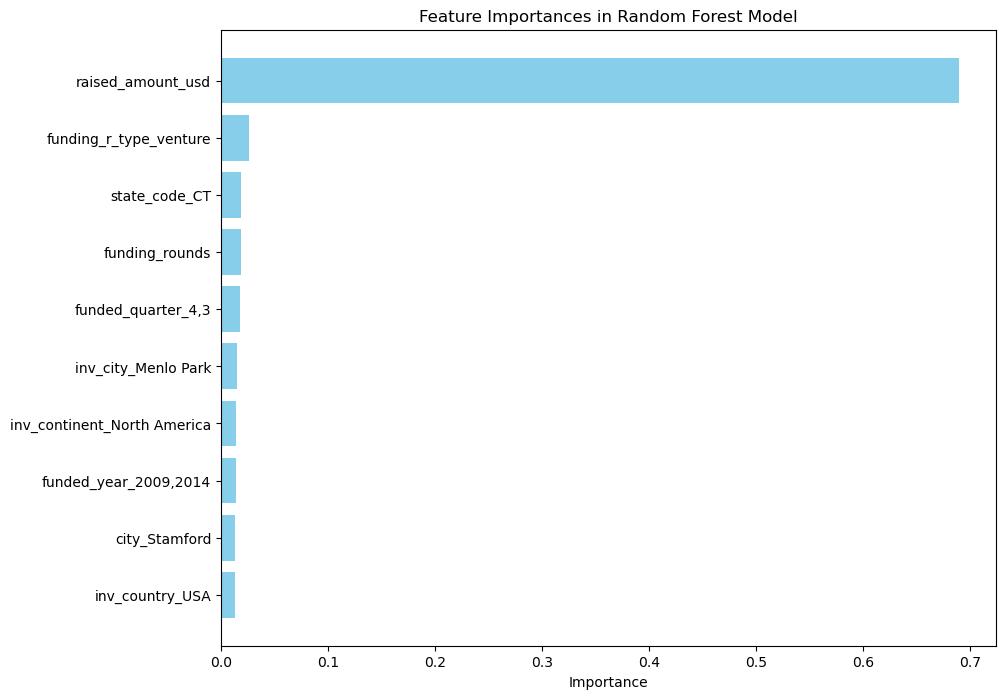

In [82]:
import matplotlib.pyplot as plt

# Given feature importances
feature_importances = [
    ('raised_amount_usd', 0.6895879753153458),
    ('funding_r_type_venture', 0.025954082100945804),
    ('state_code_CT', 0.018636271849970177),
    ('funding_rounds', 0.018495780727848028),
    ('funded_quarter_4,3', 0.01817667336693202),
    ('inv_city_Menlo Park', 0.015204338401530976),
    ('inv_continent_North America', 0.014322444933516873),
    ('funded_year_2009,2014', 0.01389424987950293),
    ('city_Stamford', 0.013345936001128395),
    ('inv_country_USA', 0.012796365724826071)
]

# Separate feature names and their importances
feature_names, importances = zip(*feature_importances)

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


Now the validation score is lower, and supposedly model overfits less to the data. The MSE has been reduced a lot compared to the initial score.

The best model (random forest)

Random forest has the lowest MSE out of all models, and very high R2, which makes it the best candidate. However, supposdly this performance is too high as model is overfitting a little bit. In the next part we will test different loss functions in line with the business knowledge. Additionally, new constaints will be added (if suitable)

## Loss function adjustment

Based on our business knowledge and the insights from the data exploration  (the first notebook). 

## Explore values of different errors on CV

In [37]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# def evaluate_model_alternative(model, X_train, y_train):
#     # Using Mean Squared Error (MSE)
#     scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#     print("Mean Squared Error Scores:", -scores_mse)
#     print("Average Mean Squared Error:", np.mean(-scores_mse))

#     # Using Mean Absolute Error (MAE)
#     scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
#     print("Mean Absolute Error Scores:", -scores_mae)
#     print("Average Mean Absolute Error:", np.mean(-scores_mae))

#     # Using Median Absolute Error
#     scores_median = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_median_absolute_error', n_jobs=-1)
#     print("Median Absolute Error Scores:", -scores_median)
#     print("Average Median Absolute Error:", np.mean(-scores_median))

#     # Using R² Score
#     scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
#     print("R² Scores:", scores_r2)
#     print("Average R² Score:", np.mean(scores_r2))

#     # Using Mean Squared Log Error (MSLE)
#     scores_msle = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1)
#     print("Mean Squared Log Error Scores:", -scores_msle)
#     print("Average Mean Squared Log Error:", np.mean(-scores_msle))

#     # Using Explained Variance Score
#     scores_explained_variance = cross_val_score(model, X_train, y_train, cv=5, scoring='explained_variance', n_jobs=-1)
#     print("Explained Variance Scores:", scores_explained_variance)
#     print("Average Explained Variance Score:", np.mean(scores_explained_variance))

# # Example usage:
# evaluate_model_alternative(model_rf, X_train, y_train)

#-------------------------# Results

# Mean Squared Error Scores: [3.38381406e+14 9.09919106e+14 3.13611459e+15 1.27382430e+15
#  7.61525478e+14]
# Average Mean Squared Error: 1283952975898382.2
# Mean Absolute Error Scores: [3076520.10128306 3589770.08797922 4789340.85180304 4354119.59507697
#  3764031.13720995]
# Average Mean Absolute Error: 3914756.3546704487
# Median Absolute Error Scores: [1228.38   630.535  950.73   896.825  889.745]
# Average Median Absolute Error: 919.242999999992
# R² Scores: [0.87324689 0.81008392 0.65339738 0.74682669 0.72654608]
# Average R² Score: 0.7620201905100211
# Mean Squared Log Error Scores: [0.09021706 0.10197445 0.13686861 0.14928924 0.11697534]
# Average Mean Squared Log Error: 0.11906494044161527
# Explained Variance Scores: [0.86315084 0.77757663 0.64616289 0.74627771 0.74654693]
# Average Explained Variance Score: 0.7559430008794654

Mean Squared Error Scores: [3.38381406e+14 9.09919106e+14 3.13611459e+15 1.27382430e+15
 7.61525478e+14]
Average Mean Squared Error: 1283952975898382.2
Mean Absolute Error Scores: [3076520.10128306 3589770.08797922 4789340.85180304 4354119.59507697
 3764031.13720995]
Average Mean Absolute Error: 3914756.3546704487
Median Absolute Error Scores: [1228.38   630.535  950.73   896.825  889.745]
Average Median Absolute Error: 919.242999999992
R² Scores: [0.87324689 0.81008392 0.65339738 0.74682669 0.72654608]
Average R² Score: 0.7620201905100211
Mean Squared Log Error Scores: [0.09021706 0.10197445 0.13686861 0.14928924 0.11697534]
Average Mean Squared Log Error: 0.11906494044161527
Explained Variance Scores: [0.86315084 0.77757663 0.64616289 0.74627771 0.74654693]
Average Explained Variance Score: 0.7559430008794654


## Change the default loss function

Change the loss function just like in skgarden tutorial

In [38]:
# pip install quantile-forest
from quantile_forest import RandomForestQuantileRegressor

# reg = RandomForestQuantileRegressor()


# Fit random forest regressor with preprocessor
model_rf_quant = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Removed the sparse_matrix conversion step
    ('regressor', RandomForestQuantileRegressor())
])

reg = model_rf_quant.fit(X_train, y_train)



In [39]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
import pycountry_convert as pc
from quantile_forest import RandomForestQuantileRegressor

# Define your preprocessing steps and other pipeline components...

# Fit random forest regressor with preprocessor
model_rf_quant = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: np.asarray(x.todense()), accept_sparse=True)),  # Convert to np.ndarray
    ('regressor', RandomForestQuantileRegressor())
])

# Assuming X_train, X_test, y_train, y_test are defined...

# Concatenate X_train and X_test to create X_mixed
X_mixed = np.concatenate([X_train, X_test])

# Recreate the DataFrame structure for X_mixed
columns = X_train.columns  # Assuming X_train and X_test have the same columns
X_mixed_df = pd.DataFrame(X_mixed, columns=columns)

# Create indices array
indices = np.concatenate([np.arange(len(X_train)), np.full(len(X_test), -1, dtype=int)])

# Fit the model
reg = model_rf_quant.fit(X_train, y_train)

# Make predictions using the fitted model
y_pred_mix = reg.predict(X_mixed_df, quantiles=[0.25, 0.5, 0.75, 0.9], oob_score=True, indices=indices)
y_pred_train_oob = y_pred_mix[:len(X_train)]  # OOB predictions on the training data
y_pred_test = y_pred_mix[-len(X_test):]  # Predictions on the test data


In [40]:
# import numpy as np
# import pandas as pd

# # Assuming X_train and X_test are pandas DataFrames
# # Recreate the DataFrame structure for X_mixed


# X_mixed = np.concatenate([X_train, X_test])

# columns = X_train.columns  # or X_test.columns, they should be the same
# X_mixed_df = pd.DataFrame(X_mixed, columns=columns)

# indices = np.concatenate([np.arange(len(X_train)), np.full(len(X_test), -1, dtype=int)])
# y_pred_mix = reg.predict(X_mixed_df, quantiles=[0.25, 0.5, 0.75], oob_score=True, indices=indices)
# y_pred_train_oob = y_pred_mix[:len(X_train)]  # predictions on the training data are OOB
# y_pred_test = y_pred_mix[-len(X_test):]  # predictions on the new test data are IB





In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd

# Function to calculate the metrics
def calculate_metrics(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, adjusted_r2, mse, mae

# Assuming you have OOB predictions for training data similar to y_pred_test
# For example: y_pred_train_oob = [predictions for 25th, 50th, 75th, 90th]

# Extract OOB predictions for each quantile
y_pred_train_oob_25th = y_pred_train_oob[:, 0]
y_pred_train_oob_50th = y_pred_train_oob[:, 1]
y_pred_train_oob_75th = y_pred_train_oob[:, 2]
y_pred_train_oob_90th = y_pred_train_oob[:, 3]

# Calculate metrics for each quantile on the training data
metrics_train_25th = calculate_metrics(y_train, y_pred_train_oob_25th, X_train)
metrics_train_50th = calculate_metrics(y_train, y_pred_train_oob_50th, X_train)
metrics_train_75th = calculate_metrics(y_train, y_pred_train_oob_75th, X_train)
metrics_train_90th = calculate_metrics(y_train, y_pred_train_oob_90th, X_train)

# Create a DataFrame to display the results for training data
results_df_train = pd.DataFrame({
    '25th Percentile': metrics_train_25th,
    '50th Percentile': metrics_train_50th,
    '75th Percentile': metrics_train_75th,
    '90th Percentile': metrics_train_90th
}, index=['R2 Score', 'Adjusted R2 Score', 'MSE', 'MAE'])

results_df_train


,25th Percentile,50th Percentile,75th Percentile,90th Percentile
R2 Score,0.5758,0.6689,0.6990,0.4363
Adjusted R2 Score,0.5520,0.6503,0.6822,0.4047
MSE,"1,961,279,437,692,276.0","1,530,811,592,578,715.5","1,391,503,443,565,278.8","2,606,302,207,435,921.0"
MAE,"4,443,735.2","3,873,424.8","4,408,854.8","6,397,576.0"


Now we want to find the optimal quartile. To prioritize mitigation of overfitting, lower MSE and MAE are more important than higher R^2, however good fit to the data is a secondary criteria. Let's start with quantiles 55, 60, 65 and 70

In [59]:
# New quantiles to evaluate
new_quantiles = [0.55, 0.60, 0.65, 0.70]

# Make predictions for the new quantiles
y_pred_mix_new = reg.predict(X_mixed_df, quantiles=new_quantiles, oob_score=True, indices=indices)

# Extract OOB predictions for the training data for new quantiles
y_pred_train_oob_new = y_pred_mix_new[:len(X_train)]  # OOB predictions for the training data

# Evaluate each new quantile on the training data
results_train = {}
for i, q in enumerate(new_quantiles):
    y_pred_quantile_train = y_pred_train_oob_new[:, i]
    results_train[f'{q*100}th quartile'] = calculate_metrics(y_train, y_pred_quantile_train, X_train)

# Convert results to DataFrame for the training data
results_df_train_new = pd.DataFrame(results_train, index=['R2 Score', 'Adjusted R2 Score', 'MSE', 'MAE'])

results_df_train_new


,55.00000000000001th Percentile,60.0th Percentile,65.0th Percentile,70.0th Percentile
R2 Score,0.6975,0.7481,0.7278,0.7154
Adjusted R2 Score,0.6806,0.7340,0.7125,0.6994
MSE,"1,398,440,665,909,024.2","1,164,531,537,167,347.0","1,258,584,770,633,131.8","1,315,964,602,902,091.5"
MAE,"3,839,607.6","3,811,865.7","3,976,367.5","4,173,241.0"


The optimal value according to the out of the bag score on the training set is somewhere between 55 and 65 quartile

In [62]:
# Adjusted quantiles to evaluate (55th and 60th percentiles)
adjusted_quantiles = [0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65]

# Make predictions for the adjusted quantiles
y_pred_mix_adjusted = reg.predict(X_mixed_df, quantiles=adjusted_quantiles, oob_score=True, indices=indices)

# Extract OOB predictions for the training data for adjusted quantiles
y_pred_train_oob_adjusted = y_pred_mix_adjusted[:len(X_train)]  # OOB predictions for the training data

# Evaluate each adjusted quantile on the training data
results_train_adjusted = {}
for i, q in enumerate(adjusted_quantiles):
    y_pred_quantile_train = y_pred_train_oob_adjusted[:, i]
    results_train_adjusted[f'{q*100}th Percentile'] = calculate_metrics(y_train, y_pred_quantile_train, X_train)

# Convert results to DataFrame for the training data
results_df_train_adjusted = pd.DataFrame(results_train_adjusted, index=['R2 Score', 'Adjusted R2 Score', 'MSE', 'MAE'])

results_df_train_adjusted


,55.00000000000001th Percentile,56.00000000000001th Percentile,56.99999999999999th Percentile,57.99999999999999th Percentile,59.0th Percentile,60.0th Percentile,61.0th Percentile,62.0th Percentile,63.0th Percentile,64.0th Percentile,65.0th Percentile
R2 Score,0.6975,0.7086,0.7234,0.7370,0.7451,0.7481,0.7433,0.7358,0.7274,0.7256,0.7278
Adjusted R2 Score,0.6806,0.6923,0.7079,0.7222,0.7307,0.7340,0.7289,0.7210,0.7121,0.7102,0.7125
MSE,"1,398,440,665,909,024.2","1,347,158,711,188,140.5","1,278,797,675,947,744.0","1,216,141,887,929,160.5","1,178,766,464,520,891.2","1,164,531,537,167,347.0","1,186,873,575,864,410.2","1,221,506,396,524,760.0","1,260,260,171,717,843.0","1,268,769,854,704,661.0","1,258,584,770,633,131.8"
MAE,"3,839,607.6","3,825,723.3","3,819,136.6","3,815,893.4","3,812,150.6","3,811,865.7","3,837,178.8","3,873,646.2","3,910,810.7","3,943,430.7","3,976,367.5"


In [57]:
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# import pandas as pd

# # Function to calculate the metrics
# def calculate_metrics(y_true, y_pred, X):
#     r2 = r2_score(y_true, y_pred)
#     n = len(y_true)
#     p = X.shape[1]
#     adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
#     mse = mean_squared_error(y_true, y_pred)
#     mae = mean_absolute_error(y_true, y_pred)
#     return r2, adjusted_r2, mse, mae

# # Extract the predictions for each quantile
# y_pred_25th = y_pred_test[:, 0]
# y_pred_50th = y_pred_test[:, 1]
# y_pred_75th = y_pred_test[:, 2]
# y_pred_90th = y_pred_test[:, 3]

# # Calculate metrics for each quantile
# metrics_25th = calculate_metrics(y_test, y_pred_25th, X_test)
# metrics_50th = calculate_metrics(y_test, y_pred_50th, X_test)
# metrics_75th = calculate_metrics(y_test, y_pred_75th, X_test)
# metrics_90th = calculate_metrics(y_test, y_pred_90th, X_test)

# # Create a DataFrame to display the results
# results_df = pd.DataFrame({
#     '25th Percentile': metrics_25th,
#     '50th Percentile': metrics_50th,
#     '75th Percentile': metrics_75th,
#     '90th Percentile': metrics_90th
# }, index=['R2 Score', 'Adjusted R2 Score', 'MSE', 'MAE'])

# results_df


,25th Percentile,50th Percentile,75th Percentile,90th Percentile
R2 Score,0.7009,0.7999,0.6614,0.0987
Adjusted R2 Score,0.6201,0.7459,0.5700,-0.1446
MSE,"683,312,423,116,456.0","457,023,715,365,980.8","773,516,461,089,335.4","2,058,909,995,686,435.5"
MAE,"3,748,306.9","3,202,707.5","3,972,005.1","6,149,942.1"


# Final assesment

Let's compare the best random forest model it with the quantile random forest minimizing underestimation on the test set

In [ ]:
#The 
rf_test = model_assess(model_rf, X_test, y_test, 'model_rf')
# ---------
rf_test

,model_rf
r2,0.8175
adj_r2,0.7682
mse,"417,017,227,333,432.7"
mae,"3,306,570.3"
mape,6.318542924973501e+17


In [65]:
# Make predictions using the fitted model
y_pred_mix = reg.predict(X_mixed_df, quantiles=[0.25, 0.5, 0.6, 0.75, 0.9], oob_score=True, indices=indices)
y_pred_train_oob = y_pred_mix[:len(X_train)]  # OOB predictions on the training data
y_pred_test = y_pred_mix[-len(X_test):]  # Predictions on the test data

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Function to calculate the metrics
def calculate_metrics(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)  # Number of observations
    p = X.shape[1]  # Number of independent variables
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, adjusted_r2, mse, mae

# Extract the 60th percentile predictions
y_pred_60th = y_pred_test[:, 2]  # Assuming 60th percentile is the third column in y_pred_test

# Calculate metrics for the 60th percentile
metrics_60th = calculate_metrics(y_test, y_pred_60th, X_test)

# Create a DataFrame to display the results for the 60th percentile
metrics_df_60th = pd.DataFrame(metrics_60th, index=['R2 Score', 'Adjusted R2 Score', 'MSE', 'MAE'], columns=['60th Percentile'])

metrics_df_60th


,60th Percentile
R2 Score,0.8171
Adjusted R2 Score,0.7678
MSE,"417,731,605,202,451.9"
MAE,"3,226,953.1"


Combine the results 

In [72]:
# Remove the 'mape' row from the rf_test DataFrame
rf_test = rf_test.drop('mape', errors='ignore')

# Standardize index labels for both DataFrames
rf_test.index = ['R2 Score', 'Adjusted R2 Score', 'MSE', 'MAE']
metrics_df_60th.index = ['R2 Score', 'Adjusted R2 Score', 'MSE', 'MAE']

# Rename the column in metrics_df_60th to match rf_test
metrics_df_60th.columns = ['60th Percentile']

# Combine the two DataFrames
combined_metrics_df = pd.concat([rf_test, metrics_df_60th], axis=1)

combined_metrics_df


,model_rf,60th Percentile
R2 Score,0.8175,0.8171
Adjusted R2 Score,0.7682,0.7678
MSE,"417,017,227,333,432.7","417,731,605,202,451.9"
MAE,"3,306,570.3","3,226,953.1"


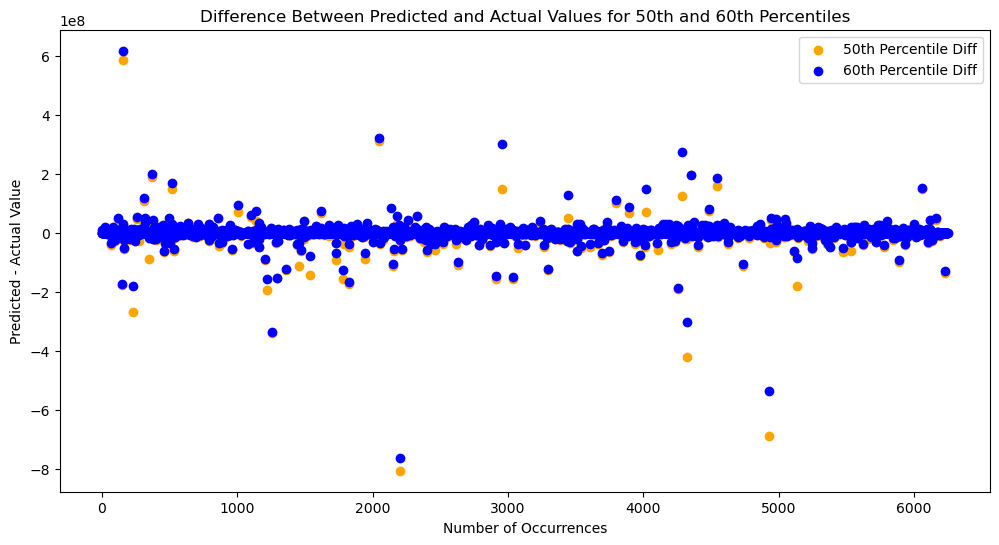

In [66]:
import matplotlib.pyplot as plt

# Assuming y_test are the actual values
actual = y_test  # Replace with your actual test values
predicted_50th = y_pred_test[:, 1]  # 50th percentile predictions
predicted_60th = y_pred_test[:, 2]  # 60th percentile predictions

# Calculate differences between predicted and actual values
diff_50th = predicted_50th - actual
diff_60th = predicted_60th - actual

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting 50th percentile differences
plt.scatter(range(len(actual)), diff_50th, label='50th Percentile Diff', color='orange')

# Plotting 60th percentile differences
plt.scatter(range(len(actual)), diff_60th, label='60th Percentile Diff', color='blue')

plt.xlabel('Number of Occurrences')
plt.ylabel('Predicted - Actual Value')
plt.title('Difference Between Predicted and Actual Values for 50th and 60th Percentiles')
plt.legend()
plt.show()


### Other visualisations of scores for different quartiles on the test set - additional part

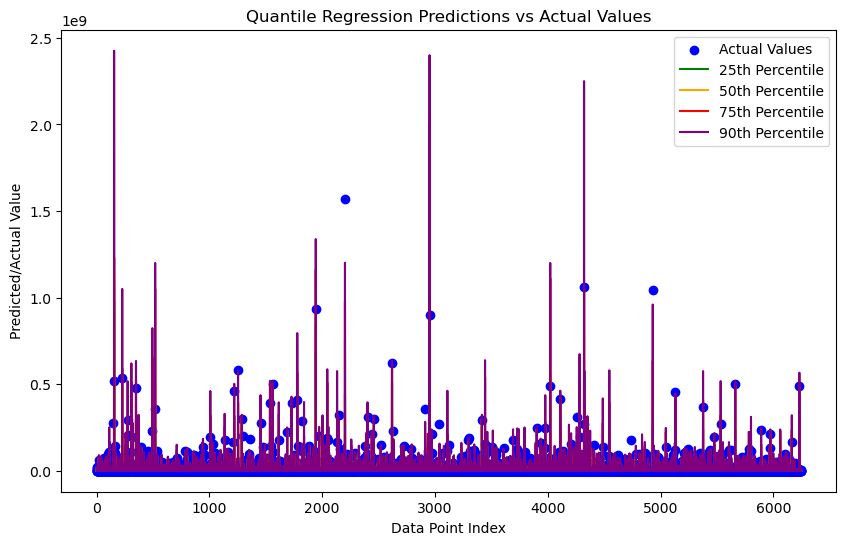

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted_25th = y_pred_test[:, 0]  # 25th percentile predictions
predicted_50th = y_pred_test[:, 1]  # 50th percentile (median) predictions
predicted_75th = y_pred_test[:, 2]  # 75th percentile predictions
predicted_90th = y_pred_test[:, 3]  # 75th percentile predictions

plt.figure(figsize=(10, 6))
plt.scatter(range(len(actual)), actual, label='Actual Values', color='blue')
plt.plot(predicted_25th, label='25th Percentile', color='green')
plt.plot(predicted_50th, label='50th Percentile', color='orange')
plt.plot(predicted_75th, label='75th Percentile', color='red')
plt.plot(predicted_90th, label='90th Percentile', color='purple')
plt.fill_between(range(len(actual)), predicted_25th, predicted_75th, color='gray', alpha=0.2)
plt.xlabel('Data Point Index')
plt.ylabel('Predicted/Actual Value')
plt.title('Quantile Regression Predictions vs Actual Values')
plt.legend()
plt.show()

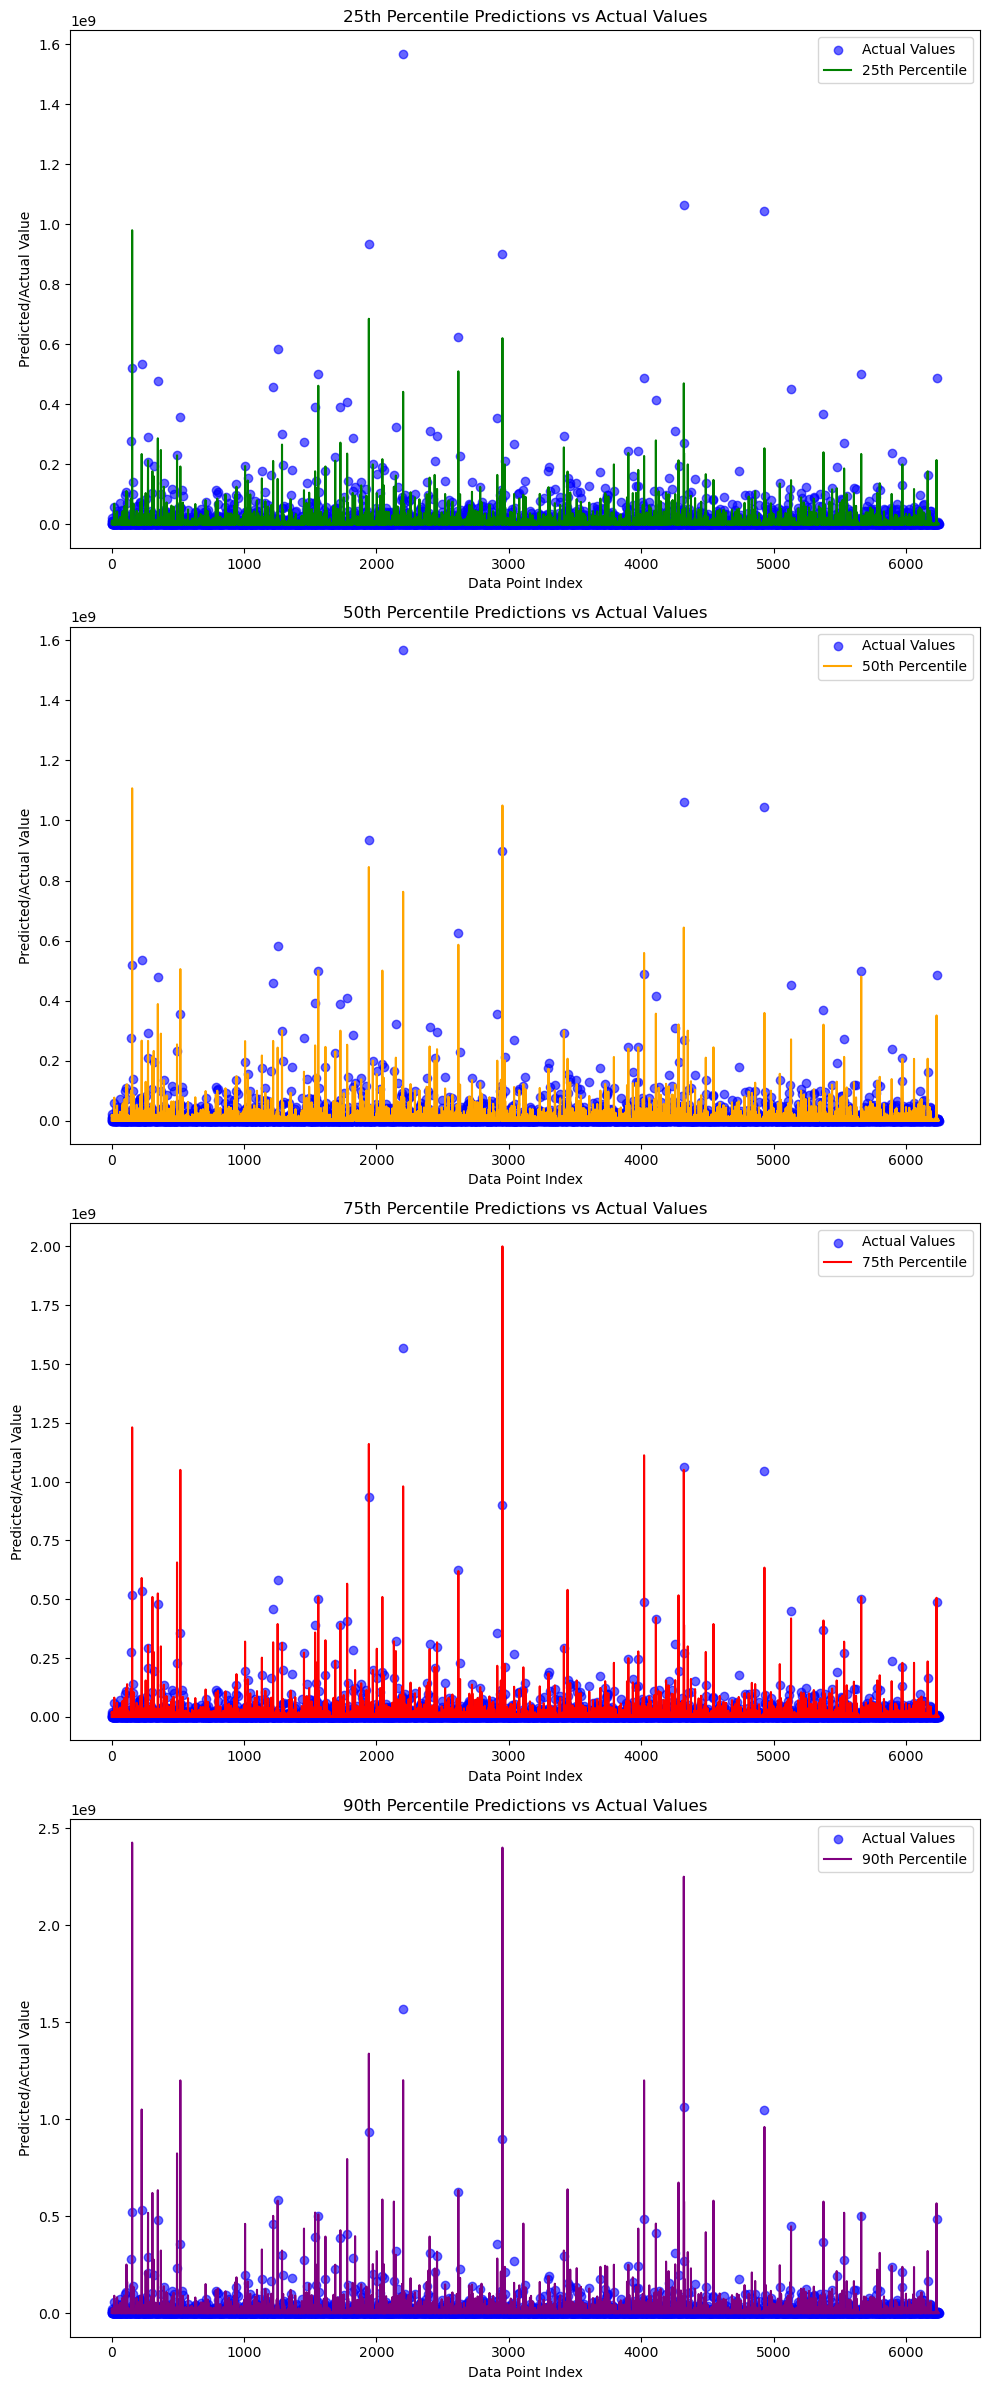

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted_25th = y_pred_test[:, 0]  # 25th percentile predictions
predicted_50th = y_pred_test[:, 1]  # 50th percentile (median) predictions
predicted_75th = y_pred_test[:, 2]  # 75th percentile predictions
predicted_90th = y_pred_test[:, 3]  # 90th percentile predictions

# Creating subplots for each quantile
fig, axs = plt.subplots(4, 1, figsize=(10, 24))  # 4 rows, 1 column

# Plotting 25th percentile
axs[0].scatter(range(len(actual)), actual, label='Actual Values', color='blue', alpha=0.6)
axs[0].plot(predicted_25th, label='25th Percentile', color='green')
axs[0].set_title('25th Percentile Predictions vs Actual Values')
axs[0].legend()

# Plotting 50th percentile
axs[1].scatter(range(len(actual)), actual, label='Actual Values', color='blue', alpha=0.6)
axs[1].plot(predicted_50th, label='50th Percentile', color='orange')
axs[1].set_title('50th Percentile Predictions vs Actual Values')
axs[1].legend()

# Plotting 75th percentile
axs[2].scatter(range(len(actual)), actual, label='Actual Values', color='blue', alpha=0.6)
axs[2].plot(predicted_75th, label='75th Percentile', color='red')
axs[2].set_title('75th Percentile Predictions vs Actual Values')
axs[2].legend()

# Plotting 90th percentile
axs[3].scatter(range(len(actual)), actual, label='Actual Values', color='blue', alpha=0.6)
axs[3].plot(predicted_90th, label='90th Percentile', color='purple')
axs[3].set_title('90th Percentile Predictions vs Actual Values')
axs[3].legend()

# Setting common labels
for ax in axs:
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel('Predicted/Actual Value')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted_25th = y_pred_test[:, 0]  # 25th percentile predictions
predicted_50th = y_pred_test[:, 1]  # 50th percentile (median) predictions
predicted_75th = y_pred_test[:, 2]  # 75th percentile predictions
predicted_90th = y_pred_test[:, 3]  # 75th percentile predictions

plt.figure(figsize=(10, 6))
plt.scatter(range(len(actual)), actual, label='Actual Values', color='blue')
plt.plot(predicted_25th, label='25th Percentile', color='green')
plt.plot(predicted_50th, label='50th Percentile', color='orange')
plt.plot(predicted_75th, label='75th Percentile', color='red')
plt.plot(predicted_90th, label='90th Percentile', color='purple')
plt.fill_between(range(len(actual)), predicted_25th, predicted_75th, color='gray', alpha=0.2)
plt.xlabel('Data Point Index')
plt.ylabel('Predicted/Actual Value')
plt.title('Quantile Regression Predictions vs Actual Values')
plt.legend()
plt.show()

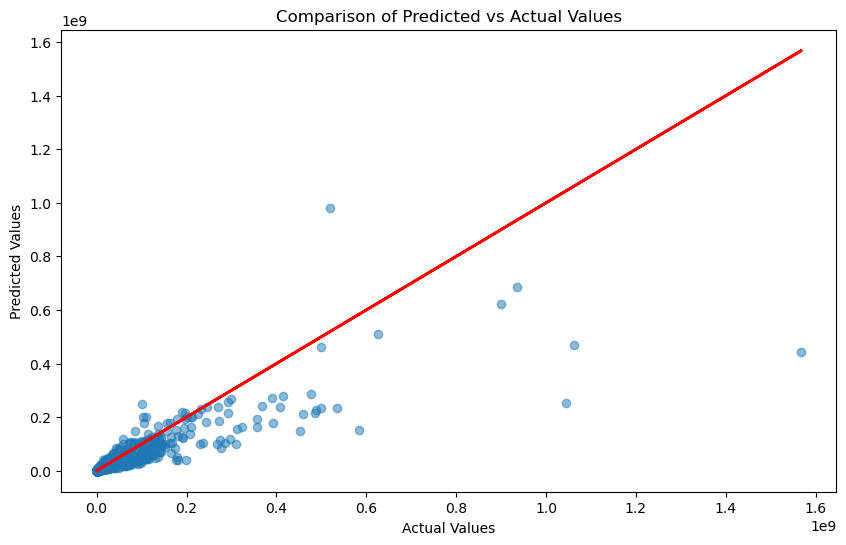

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted = y_pred_test[:, 0]  # For example, using 25th percentile predictions

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(actual, predicted, alpha=0.5)

# Line of perfect prediction
plt.plot(actual, actual, color='red', linewidth=2)

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs Actual Values')

plt.show()


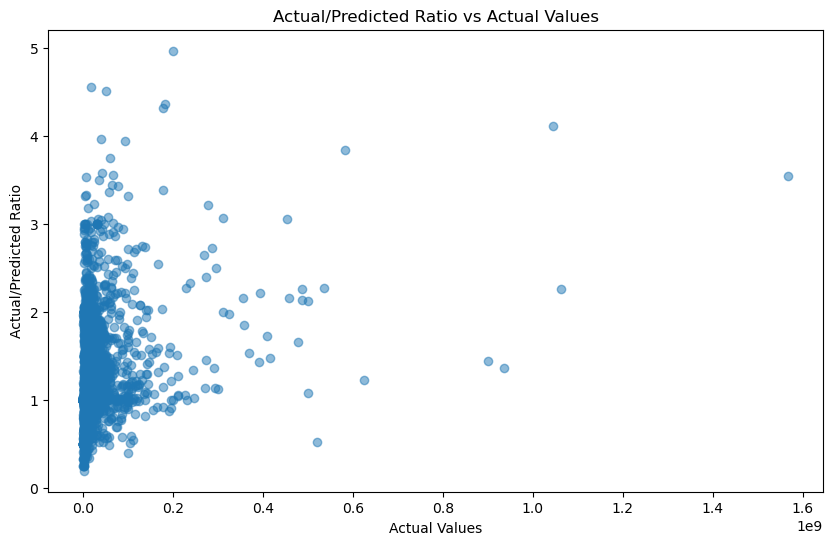

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted = y_pred_test[:, 0]  # For example, using 25th percentile predictions

plt.figure(figsize=(10, 6))

# Calculating the ratio of Actual/Predicted
ratio = actual / predicted

# Scatter plot of Actual Value vs Actual/Predicted Ratio
plt.scatter(actual, ratio, alpha=0.5)

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Actual/Predicted Ratio')
plt.title('Actual/Predicted Ratio vs Actual Values')

plt.show()


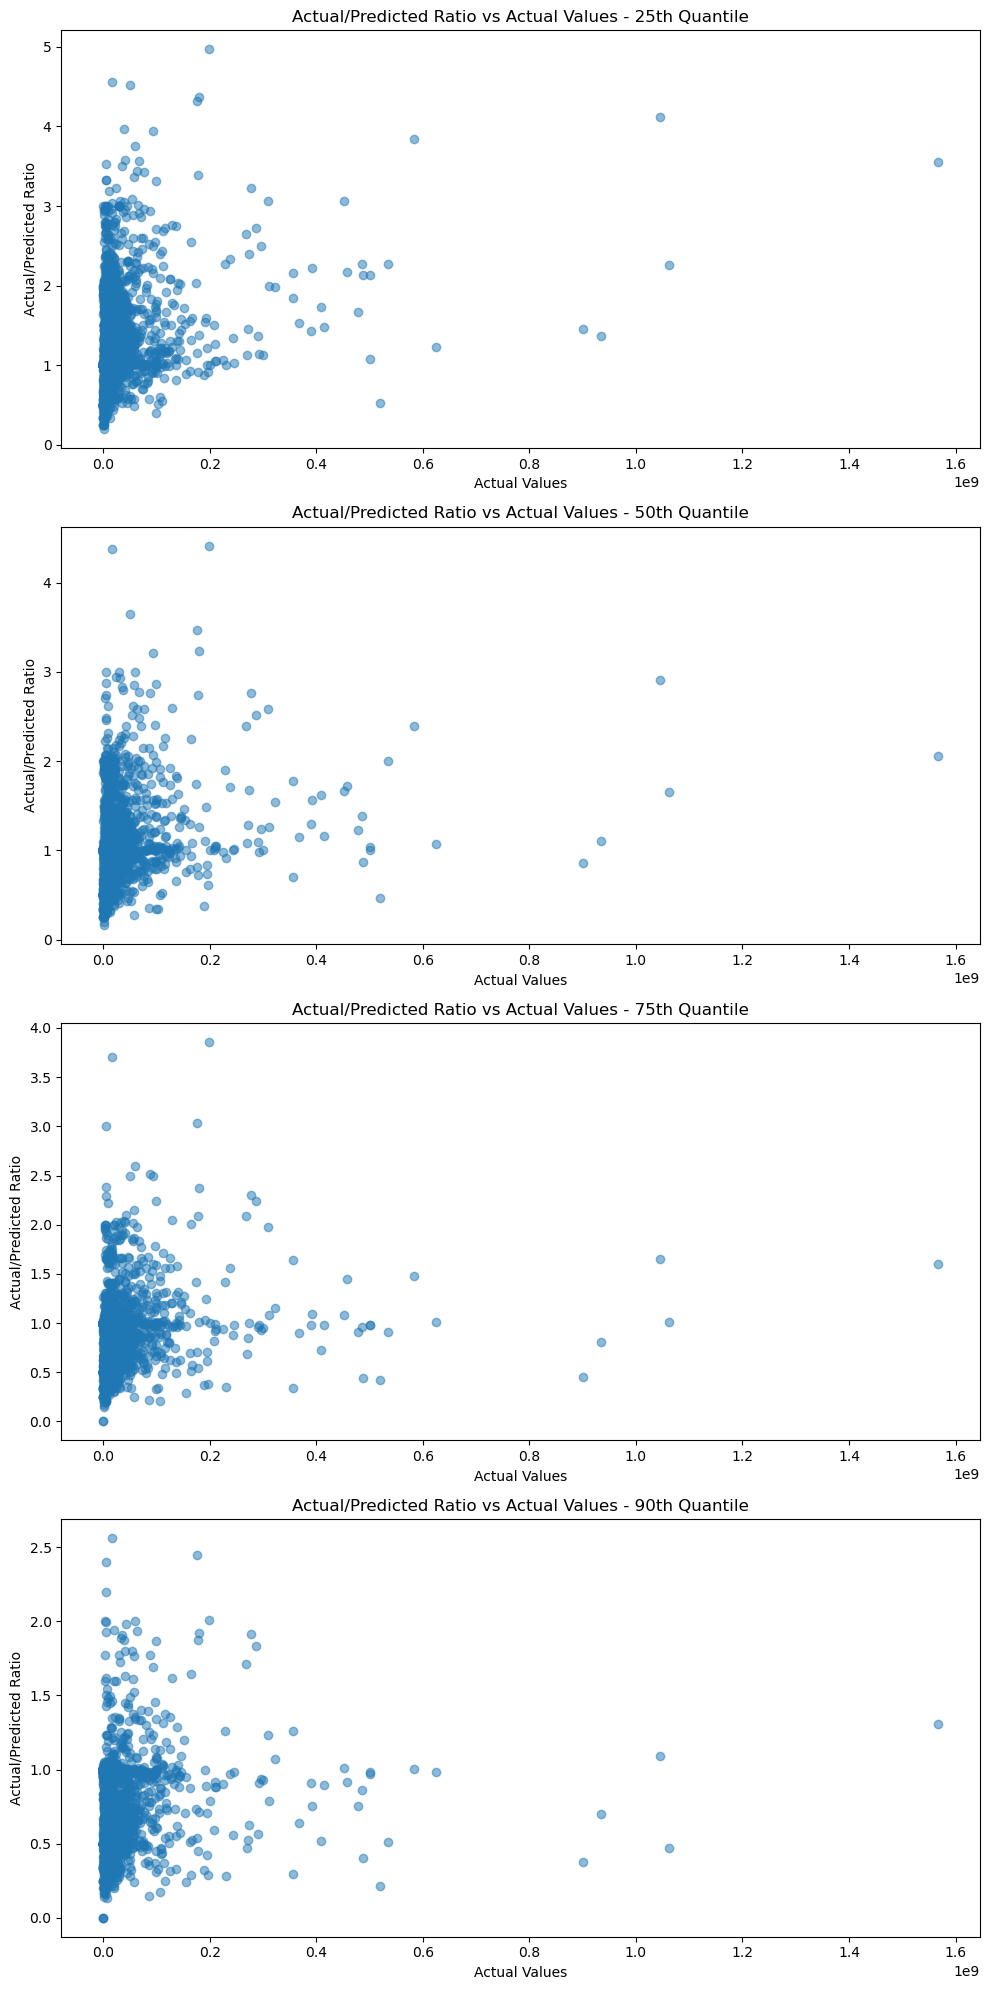

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted_25th = y_pred_test[:, 0]  # 25th percentile predictions
predicted_50th = y_pred_test[:, 1]  # 50th percentile (median) predictions
predicted_75th = y_pred_test[:, 2]  # 75th percentile predictions
predicted_90th = y_pred_test[:, 3]  # 90th percentile predictions

# Creating subplots for each quantile
fig, axs = plt.subplots(4, 1, figsize=(10, 20))  # 4 rows, 1 column

# Function to plot each quantile
def plot_quantile(ax, actual, predicted, quantile_label):
    ratio = actual / predicted
    ax.scatter(actual, ratio, alpha=0.5)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Actual/Predicted Ratio')
    ax.set_title(f'Actual/Predicted Ratio vs Actual Values - {quantile_label} Quantile')

# Plotting each quantile
plot_quantile(axs[0], actual, predicted_25th, '25th')
plot_quantile(axs[1], actual, predicted_50th, '50th')
plot_quantile(axs[2], actual, predicted_75th, '75th')
plot_quantile(axs[3], actual, predicted_90th, '90th')

# Adjust layout
plt.tight_layout()
plt.show()


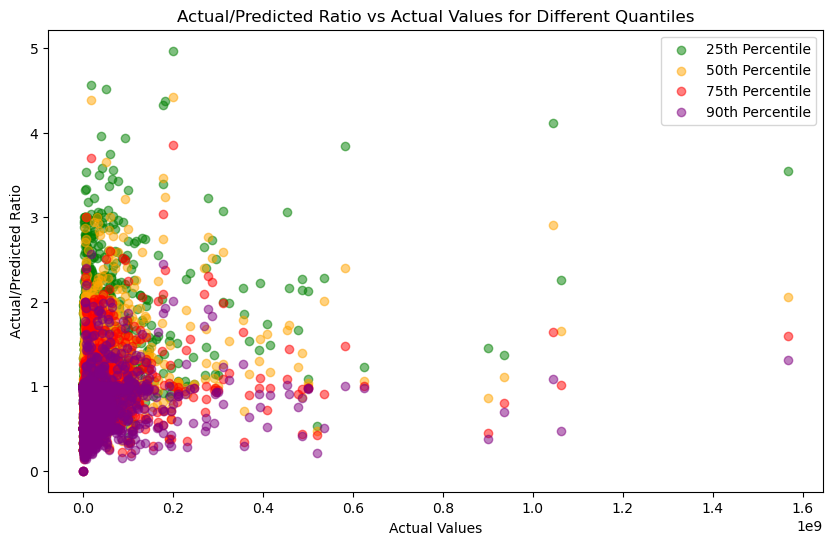

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted_25th = y_pred_test[:, 0]  # 25th percentile predictions
predicted_50th = y_pred_test[:, 1]  # 50th percentile (median) predictions
predicted_75th = y_pred_test[:, 2]  # 75th percentile predictions
predicted_90th = y_pred_test[:, 3]  # 90th percentile predictions

plt.figure(figsize=(10, 6))

# Plotting Actual/Predicted Ratio for each quantile
plt.scatter(actual, actual / predicted_25th, alpha=0.5, label='25th Percentile', color='green')
plt.scatter(actual, actual / predicted_50th, alpha=0.5, label='50th Percentile', color='orange')
plt.scatter(actual, actual / predicted_75th, alpha=0.5, label='75th Percentile', color='red')
plt.scatter(actual, actual / predicted_90th, alpha=0.5, label='90th Percentile', color='purple')

# Labels, title, and legend
plt.xlabel('Actual Values')
plt.ylabel('Actual/Predicted Ratio')
plt.title('Actual/Predicted Ratio vs Actual Values for Different Quantiles')
plt.legend()

plt.show()


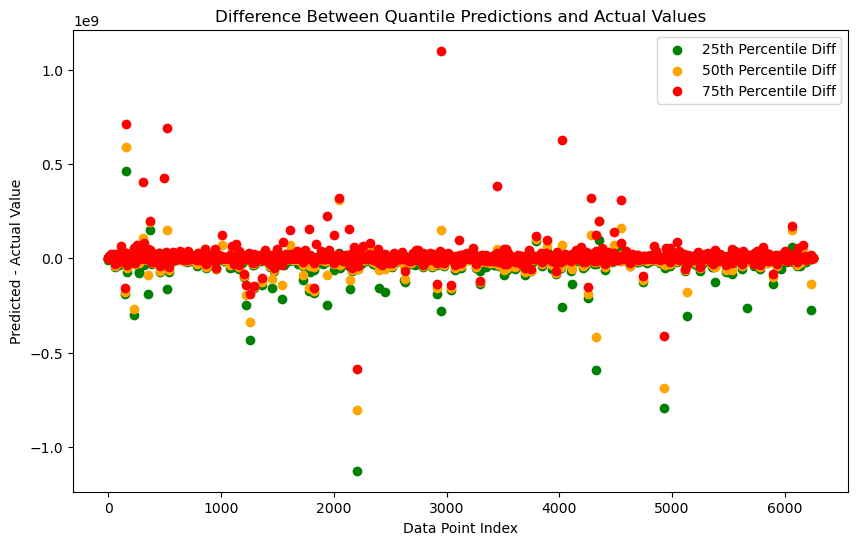

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted_25th = y_pred_test[:, 0]  # 25th percentile predictions
predicted_50th = y_pred_test[:, 1]  # 50th percentile (median) predictions
predicted_75th = y_pred_test[:, 2]  # 75th percentile predictions

# Calculate differences between predicted and actual values
diff_25th = predicted_25th - actual
diff_50th = predicted_50th - actual
diff_75th = predicted_75th - actual

plt.figure(figsize=(10, 6))
plt.scatter(range(len(actual)), diff_25th, label='25th Percentile Diff', color='green')
plt.scatter(range(len(actual)), diff_50th, label='50th Percentile Diff', color='orange')
plt.scatter(range(len(actual)), diff_75th, label='75th Percentile Diff', color='red')
plt.xlabel('Data Point Index')
plt.ylabel('Predicted - Actual Value')
plt.title('Difference Between Quantile Predictions and Actual Values')
plt.legend()
plt.show()


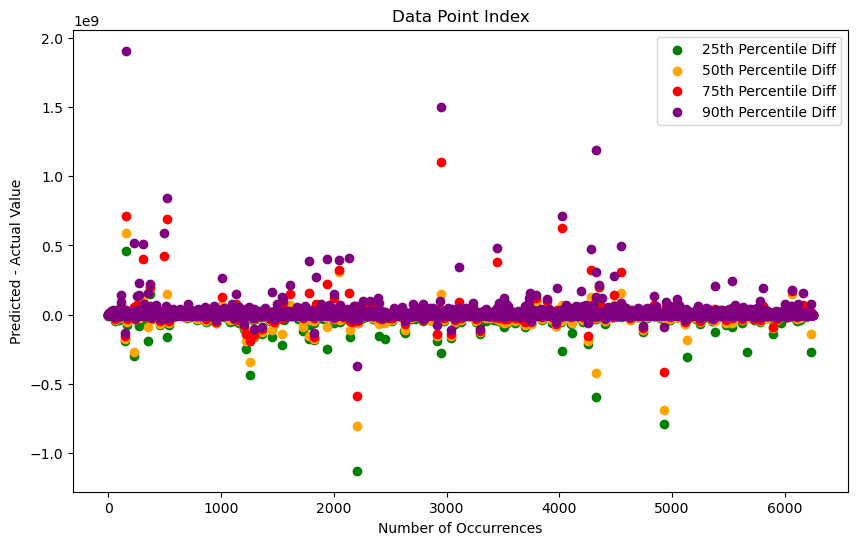

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted_25th = y_pred_test[:, 0]  # 25th percentile predictions
predicted_50th = y_pred_test[:, 1]  # 50th percentile (median) predictions
predicted_75th = y_pred_test[:, 2]  # 75th percentile predictions
predicted_90th = y_pred_test[:, 3]  # 90th percentile predictions (assuming it's in the fourth column)

# Calculate differences between predicted and actual values
diff_25th = predicted_25th - actual
diff_50th = predicted_50th - actual
diff_75th = predicted_75th - actual
diff_90th = predicted_90th - actual

plt.figure(figsize=(10, 6))
plt.scatter(range(len(actual)), diff_25th, label='25th Percentile Diff', color='green')
plt.scatter(range(len(actual)), diff_50th, label='50th Percentile Diff', color='orange')
plt.scatter(range(len(actual)), diff_75th, label='75th Percentile Diff', color='red')
plt.scatter(range(len(actual)), diff_90th, label='90th Percentile Diff', color='purple')
plt.xlabel('Number of Occurrences')
plt.ylabel('Predicted - Actual Value')
plt.title('Data Point Index')
plt.legend()
plt.show()


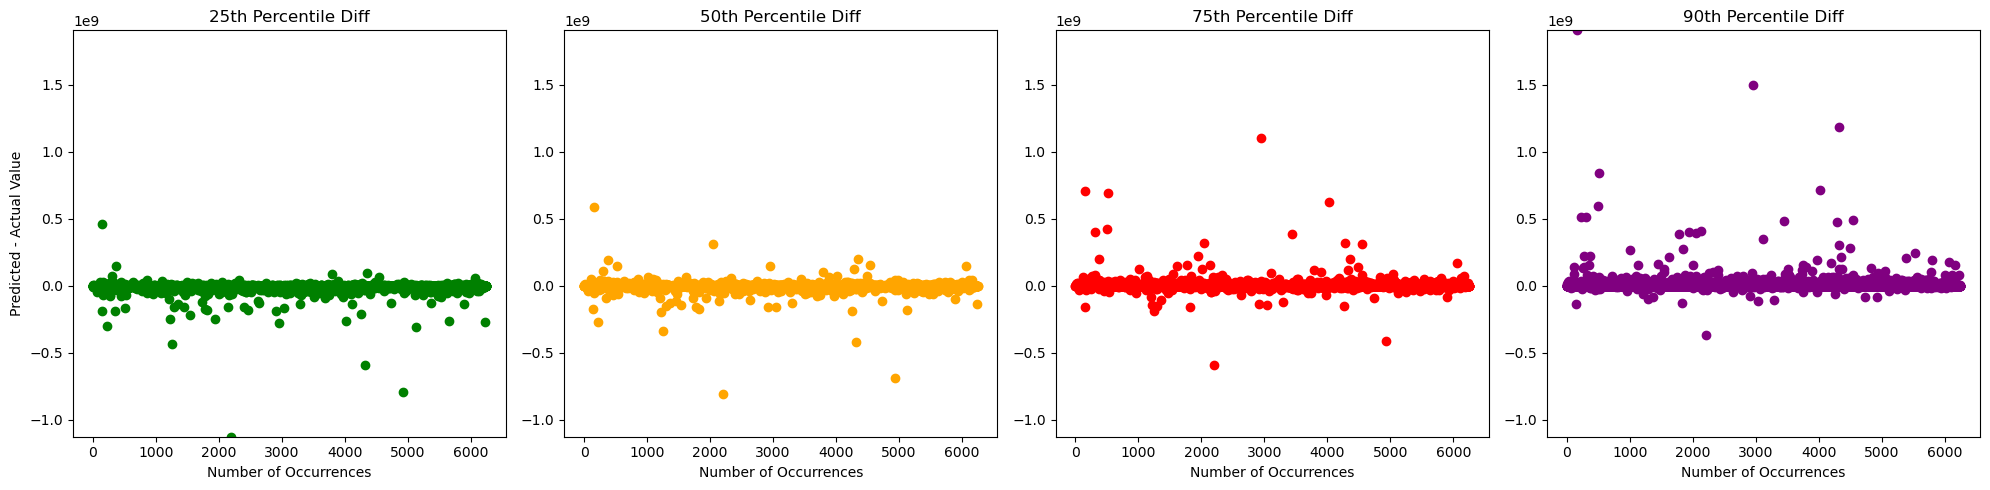

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test are the actual values and y_pred_test contains the quantile predictions
actual = y_test  # Replace with your actual test values
predicted_25th = y_pred_test[:, 0]  # 25th percentile predictions
predicted_50th = y_pred_test[:, 1]  # 50th percentile (median) predictions
predicted_75th = y_pred_test[:, 2]  # 75th percentile predictions
predicted_90th = y_pred_test[:, 3]  # 90th percentile predictions

# Calculate differences between predicted and actual values
diff_25th = predicted_25th - actual
diff_50th = predicted_50th - actual
diff_75th = predicted_75th - actual
diff_90th = predicted_90th - actual

# Determine common y-axis limits
all_diffs = np.concatenate([diff_25th, diff_50th, diff_75th, diff_90th])
y_min, y_max = np.min(all_diffs), np.max(all_diffs)

# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# 25th percentile
axs[0].scatter(range(len(actual)), diff_25th, color='green')
axs[0].set_title('25th Percentile Diff')
axs[0].set_xlabel('Number of Occurrences')
axs[0].set_ylabel('Predicted - Actual Value')
axs[0].set_ylim([y_min, y_max])

# 50th percentile
axs[1].scatter(range(len(actual)), diff_50th, color='orange')
axs[1].set_title('50th Percentile Diff')
axs[1].set_xlabel('Number of Occurrences')
axs[1].set_ylim([y_min, y_max])

# 75th percentile
axs[2].scatter(range(len(actual)), diff_75th, color='red')
axs[2].set_title('75th Percentile Diff')
axs[2].set_xlabel('Number of Occurrences')
axs[2].set_ylim([y_min, y_max])

# 90th percentile
axs[3].scatter(range(len(actual)), diff_90th, color='purple')
axs[3].set_title('90th Percentile Diff')
axs[3].set_xlabel('Number of Occurrences')
axs[3].set_ylim([y_min, y_max])

plt.tight_layout()
plt.show()


Tuning the model - potentially useful for future research

In [55]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for RandomForestQuantileRegressor
# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],  # Number of trees
#     'regressor__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#     'regressor__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'regressor__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     # Additional parameters specific to RandomForestQuantileRegressor can be added here
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(model_rf_quant, param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model using GridSearchCV
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# # Use the best model for predictions or further analysis
# best_model = grid_search.best_estimator_
